## Heading

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from scipy.stats import zscore

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/properties.csv")
pd.set_option('display.max_columns', None) # Displays all the columns

In [3]:
df[["nbr_frontages", "fl_terrace", "equipped_kitchen"]].head()

,nbr_frontages,fl_terrace,equipped_kitchen
0,2.0,1,INSTALLED
1,NaN,0,MISSING
2,2.0,1,INSTALLED
3,NaN,0,MISSING
4,2.0,1,HYPER_EQUIPPED


In [4]:
df.shape

(75511, 30)

In [5]:
print(df.dtypes)

id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                      

In [6]:

for locality in df.locality.unique():
    mean_lat = round(df[df['locality'] == locality].latitude.mean(), 6)
    mean_long = round(df[df['locality'] == locality].longitude.mean(), 6)

    #print(f'{locality}\n  mean latitude: {mean_lat}\n  mean longitude: {mean_long}')
    
    cond = df['locality'] == locality  # Condition
    df.loc[cond,'latitude'] = df.loc[cond,'latitude'].fillna(mean_lat)
    df.loc[cond,'longitude'] = df.loc[cond,'longitude'].fillna(mean_long)

In [7]:
df.region.value_counts()

region
Flanders            43424
Wallonia            24126
Brussels-Capital     7958
MISSING                 3
Name: count, dtype: int64

In [8]:
df_house = df[df["property_type"] == "HOUSE"]
df_apartment = df[df["property_type"] == "APARTMENT"]

In [9]:
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [10]:
df.subproperty_type.value_counts()

subproperty_type
HOUSE                   29730
APARTMENT               28760
VILLA                    3276
GROUND_FLOOR             2169
APARTMENT_BLOCK          2043
MIXED_USE_BUILDING       1577
PENTHOUSE                1564
DUPLEX                   1497
FLAT_STUDIO              1135
EXCEPTIONAL_PROPERTY      599
TOWN_HOUSE                463
SERVICE_FLAT              459
MANSION                   453
BUNGALOW                  308
KOT                       293
LOFT                      270
FARMHOUSE                 218
COUNTRY_COTTAGE           213
MANOR_HOUSE               158
TRIPLEX                   109
OTHER_PROPERTY             85
CHALET                     83
CASTLE                     49
Name: count, dtype: int64

In [11]:
df = df.drop(df[df['subproperty_type'] == "CASTLE"].index)

## Outliers

In [12]:
print(df.shape)
print(df.head())

for column in df.select_dtypes(include=["float64"]).columns:
    # Calculate the z-score for each student's height
    z = np.abs(zscore(df[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df = df.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df.shape)
print(df.head())

(75462, 30)
         id     price property_type subproperty_type            region  \
0  34221000  225000.0     APARTMENT        APARTMENT          Flanders   
1   2104000  449000.0         HOUSE            HOUSE          Flanders   
2  34036000  335000.0     APARTMENT        APARTMENT  Brussels-Capital   
3  58496000  501000.0         HOUSE            HOUSE          Flanders   
4  48727000  982700.0     APARTMENT           DUPLEX          Wallonia   

          province  locality  zip_code   latitude  longitude  \
0          Antwerp   Antwerp      2050  51.217172   4.379982   
1    East Flanders      Gent      9185  51.174944   3.845248   
2         Brussels  Brussels      1070  50.842043   4.334543   
3          Antwerp  Turnhout      2275  51.238312   4.817192   
4  Walloon Brabant  Nivelles      1410  50.674643   4.507807   

   construction_year  total_area_sqm  surface_land_sqm  nbr_frontages  \
0             1963.0           100.0               NaN            2.0   
1           

In [13]:
df.subproperty_type.value_counts()

subproperty_type
HOUSE                   29310
APARTMENT               28438
VILLA                    2947
GROUND_FLOOR             2155
APARTMENT_BLOCK          1676
PENTHOUSE                1499
MIXED_USE_BUILDING       1465
DUPLEX                   1461
FLAT_STUDIO              1133
TOWN_HOUSE                461
SERVICE_FLAT              459
EXCEPTIONAL_PROPERTY      456
MANSION                   383
BUNGALOW                  308
KOT                       287
LOFT                      266
COUNTRY_COTTAGE           206
FARMHOUSE                 189
MANOR_HOUSE               136
TRIPLEX                   109
CHALET                     83
OTHER_PROPERTY             76
Name: count, dtype: int64

In [15]:
print(df_house.shape)

for column in df_house.select_dtypes(include=["float64"]).columns:
    # Calculate the z-score for each student's height
    z = np.abs(zscore(df_house[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df_house[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df_house = df_house.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df_house.shape)

(39255, 30)
price: 578
latitude: 0
longitude: 0
construction_year: 0
total_area_sqm: 0
surface_land_sqm: 191
nbr_frontages: 0
nbr_bedrooms: 424
terrace_sqm: 0
garden_sqm: 0
primary_energy_consumption_sqm: 0
cadastral_income: 0
(38062, 30)


In [ ]:
print(df_apartment.shape)

for column in df_house.select_dtypes(include=["float64"]).columns:
    # Calculate the z-score for each student's height
    z = np.abs(zscore(df_house[column]))

    # Identify outliers as students with a z-score greater than 3
    threshold = 3
    outliers = df_house[z > threshold]

    # Print the outliers
    print(f'{column}: {len(outliers)}')
    df_house = df_house.drop(outliers.index)

#numeric_cols = df.select_dtypes(include=["float64"]).columns
#df[numeric_cols].apply(zscore)
    
print(df_house.shape)

In [9]:
df.size

79620

In [73]:
df_cat = df.select_dtypes(include=["object"]).columns
df_cat

Index(['property_type', 'subproperty_type', 'region', 'province', 'locality',
       'equipped_kitchen', 'state_building', 'epc', 'heating_type'],
      dtype='object')

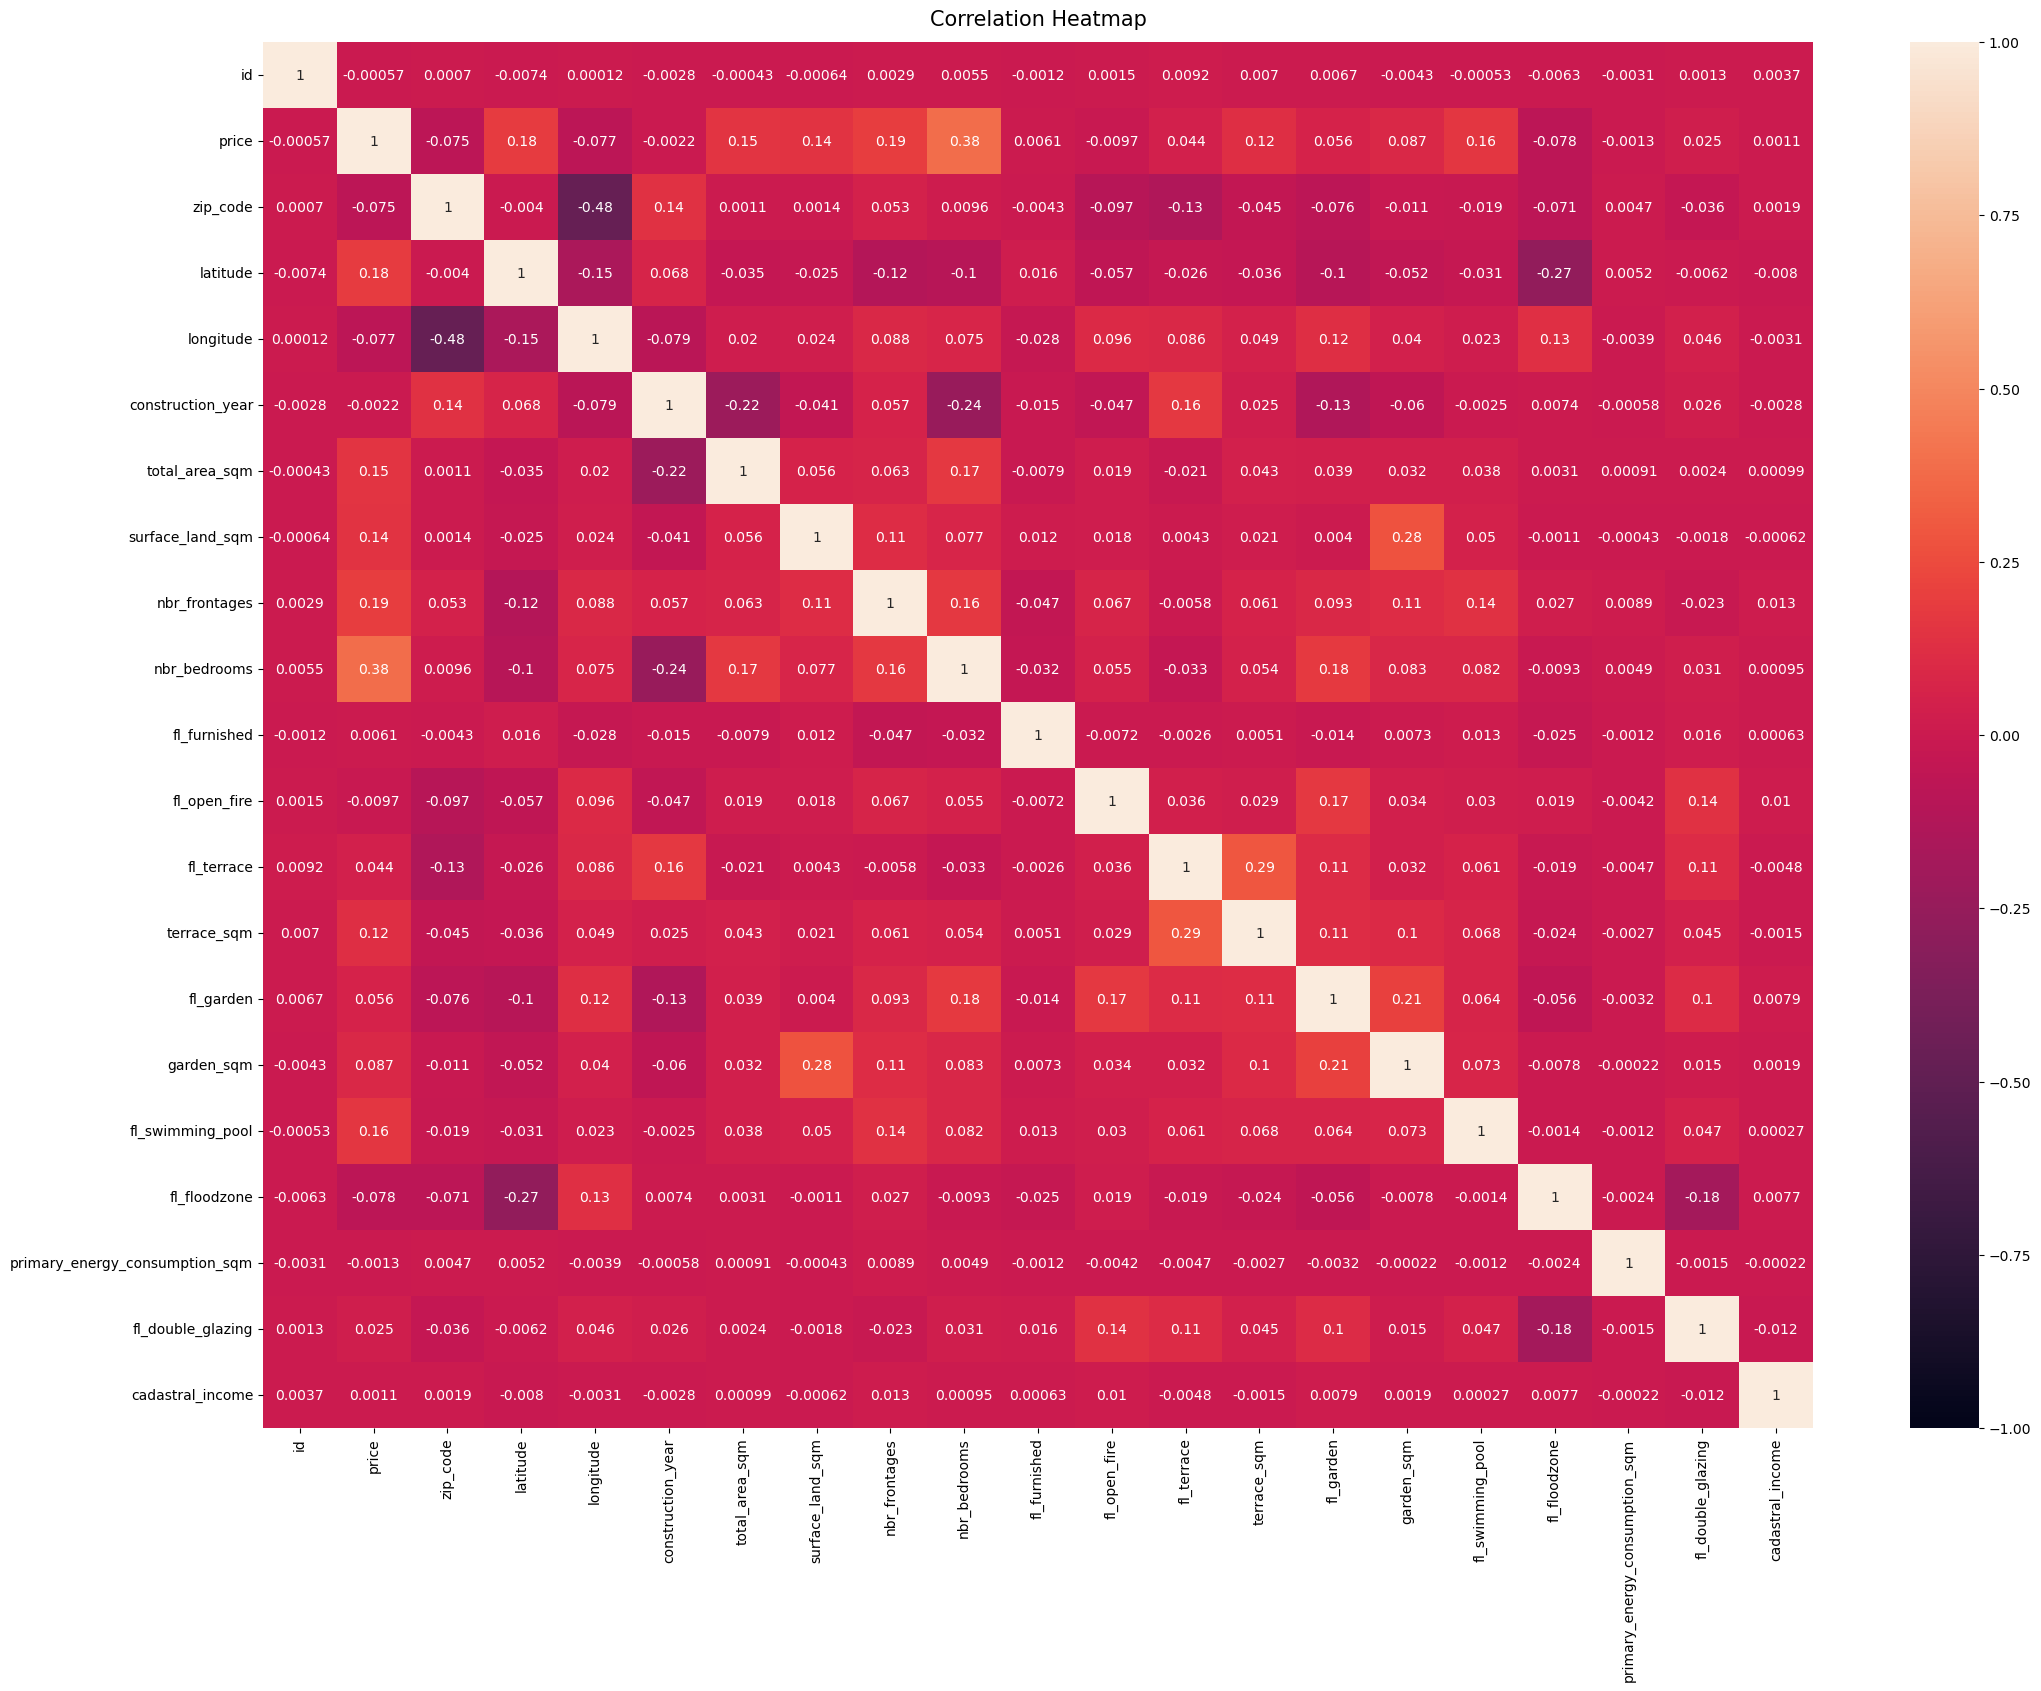

In [14]:
plt.figure(figsize=(25, 18))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.

heatmap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

['Flanders', 'Brussels-Capital', 'Wallonia', 'MISSING']


IndexError: index 3 is out of bounds for axis 0 with size 3

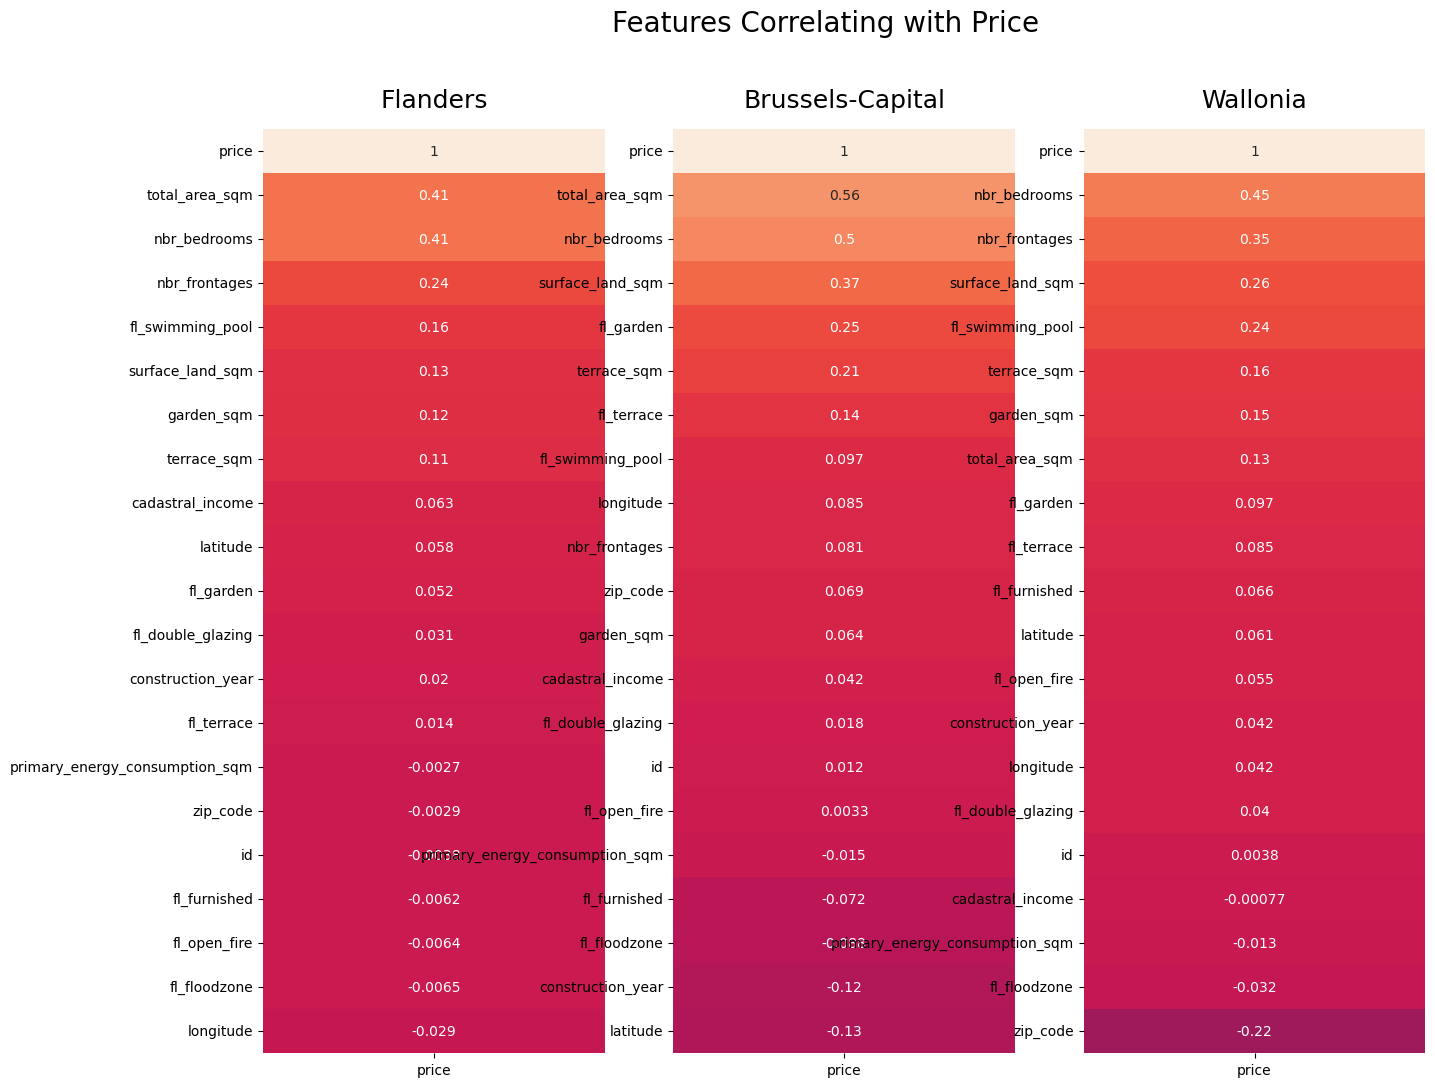

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 12))

fig.suptitle('Features Correlating with Price', fontsize=20)

#sns.boxplot(ax=axes[0, 0], data=pokemon, x='Generation', y='Attack')

municipality = df.region.unique().tolist()
print(municipality)
municipality = [i for i in municipality if i is not None]

for i in range(len(municipality)):
    immo_region = df[df['region'] == municipality[i]]
    heatmap = sns.heatmap(immo_region.corr(numeric_only=True)[['price']].sort_values(by='price', ascending=False), ax=axes[i], vmin=-1, vmax=1, annot=True, cbar=False)
    heatmap.set_title(f'{municipality[i]}', fontdict={'fontsize':18}, pad=16);
    
fig.tight_layout()

In [67]:
CrosstabResult = pd.crosstab(index=df['equipped_kitchen'], columns=df['state_building'])
CrosstabResult

#ChiSqResult = chi2_contingency(CrosstabResult)
#print(f'P-value of the X2 is: {ChiSqResult}')

state_building,AS_NEW,GOOD,JUST_RENOVATED,MISSING,TO_BE_DONE_UP,TO_RENOVATE,TO_RESTORE
equipped_kitchen,,,,,,,
HYPER_EQUIPPED,3474,2661,387,2340,136,59,1
INSTALLED,3458,6303,913,6816,1143,728,12
MISSING,4162,9587,595,14396,1556,2494,232
NOT_INSTALLED,384,304,30,890,267,754,47
SEMI_EQUIPPED,159,1814,164,853,979,1115,35
USA_HYPER_EQUIPPED,2480,468,248,829,46,16,5
USA_INSTALLED,496,477,122,402,104,57,4
USA_SEMI_EQUIPPED,111,118,23,47,60,58,0
USA_UNINSTALLED,12,5,1,70,2,2,0


In [6]:
print(df["province"].value_counts())
print(df["locality"].value_counts())
print(df[df["province"] == "MISSING"])

province
West Flanders      11798
Antwerp            10771
East Flanders      10412
Hainaut             8732
Brussels            7958
Liège               7067
Flemish Brabant     7006
Limburg             3437
Walloon Brabant     3088
Namur               3004
Luxembourg          2235
MISSING                3
Name: count, dtype: int64
locality
Brussels             7958
Antwerp              5880
Liège                4632
Brugge               4326
Halle-Vilvoorde      3852
Gent                 3272
Turnhout             3164
Leuven               3154
Nivelles             3088
Oostend              2871
Aalst                2694
Charleroi            2390
Kortrijk             2153
Hasselt              2054
Namur                2043
Mechelen             1727
Sint-Niklaas         1664
Mons                 1631
Veurne               1611
Dendermonde          1380
Verviers             1362
Tournai              1273
Oudenaarde           1252
Soignies             1208
Thuin                 830
Mouscr

#df[df["latitude"].isnull()].locality.unique()

In [40]:
df.locality.unique()

array(['Antwerp', 'Gent', 'Brussels', 'Turnhout', 'Nivelles',
       'Halle-Vilvoorde', 'Liège', 'Brugge', 'Sint-Niklaas', 'Veurne',
       'Verviers', 'Mechelen', 'Charleroi', 'Dendermonde', 'Bastogne',
       'Leuven', 'Hasselt', 'Mons', 'Aalst', 'Tournai', 'Oostend',
       'Oudenaarde', 'Philippeville', 'Kortrijk', 'Dinant', 'Ieper',
       'Huy', 'Marche-en-Famenne', 'Namur', 'Maaseik', 'Mouscron',
       'Diksmuide', 'Soignies', 'Neufchâteau', 'Arlon', 'Tongeren',
       'Waremme', 'Thuin', 'Virton', 'Ath', 'Roeselare', 'Tielt', 'Eeklo',
       'MISSING'], dtype=object)

In [48]:
df_Ieper = df_check[df_check['locality'] == "Roeselare"]
df_Ieper.tail()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
74458,27189000,275750.0,APARTMENT,APARTMENT,Flanders,West Flanders,Roeselare,8840,50.975268,3.015018,2024.0,91.0,NaN,NaN,2.0,INSTALLED,0,0,0,0.0,0,0.0,0,0,GOOD,NaN,MISSING,ELECTRIC,1,NaN
74902,21320000,259000.0,APARTMENT,APARTMENT,Flanders,West Flanders,Roeselare,8770,50.915320,3.248151,2023.0,75.0,NaN,NaN,1.0,MISSING,0,0,1,11.0,0,0.0,0,0,MISSING,NaN,MISSING,MISSING,1,NaN
74934,24892000,435000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.946150,3.122072,1930.0,NaN,75.0,2.0,5.0,INSTALLED,0,0,0,0.0,0,0.0,0,1,MISSING,382.0,D,MISSING,0,488.0
74999,25261000,256500.0,APARTMENT,APARTMENT,Flanders,West Flanders,Roeselare,8800,50.927249,3.153009,NaN,102.0,NaN,2.0,2.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN
75098,15290000,300000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8880,50.855884,3.128230,2018.0,138.0,138.0,2.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,GOOD,81.0,A,GAS,1,NaN


In [49]:
df_Ieper.latitude.isnull().value_counts()

latitude
False    242
Name: count, dtype: int64

In [43]:
mean_lat = round(df_Ieper.latitude.mean(), 6)

In [44]:
#df_Ieper["latitude"] = np.where(mean_lat, df_Ieper["latitude"], df_Ieper["latitude"])
#df_Ieper.loc[df_Ieper["latitude"].isnull() == True] = mean_lat
#df_Ieper.latitude.fillna(mean_lat)
df_Ieper[["latitude"]] = df_Ieper[["latitude"]].fillna(mean_lat)

df_Ieper.head()

C:\Users\Jean\AppData\Local\Temp\ipykernel_21140\3456038015.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Ieper[["latitude"]] = df_Ieper[["latitude"]].fillna(mean_lat)


,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
469,28104000,453146.0,HOUSE,BUNGALOW,Flanders,West Flanders,Roeselare,8800,50.970366,3.107997,NaN,NaN,463.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,GOOD,10.0,A,MISSING,0,NaN
903,11119000,423708.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.942036,3.152434,NaN,NaN,406.0,4.0,3.0,MISSING,0,0,1,NaN,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN
1054,73927000,345600.0,APARTMENT,APARTMENT,Flanders,West Flanders,Roeselare,8770,50.904070,3.262932,2022.0,126.0,NaN,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,0.0,MISSING,MISSING,0,NaN
1359,18244000,326000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.955436,3.158072,NaN,NaN,196.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,NaN,MISSING,MISSING,0,NaN
2101,29071000,329500.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8840,50.972991,3.007373,1948.0,191.0,379.0,4.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,GOOD,197.0,B,GAS,1,572.0


In [45]:
df_Ieper.latitude.isnull().value_counts()

latitude
False    242
Name: count, dtype: int64

In [46]:
df_Ieper[df_Ieper['latitude'] == mean_lat]

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
13819,43295000,761555.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8840,50.93494,NaN,NaN,207.0,2688.0,NaN,3.0,HYPER_EQUIPPED,0,0,0,0.0,0,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN
16948,333000,603757.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8770,50.93494,NaN,NaN,164.0,733.0,NaN,3.0,HYPER_EQUIPPED,0,0,0,0.0,0,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN
19211,16860000,269000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.93494,NaN,1995.0,155.0,145.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,381.0,D,MISSING,0,548.0
25149,3373000,207500.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8840,50.93494,NaN,1960.0,193.0,289.0,3.0,2.0,MISSING,0,0,1,NaN,0,0.0,0,1,GOOD,333.0,D,GAS,0,645.0
36852,73818000,198000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.93494,NaN,NaN,120.0,59.0,2.0,3.0,INSTALLED,0,0,0,0.0,0,0.0,0,0,JUST_RENOVATED,192.0,B,GAS,1,339.0
37629,49869000,581917.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8870,50.93494,NaN,NaN,202.0,2718.0,NaN,3.0,HYPER_EQUIPPED,0,0,0,0.0,0,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN
41528,38150000,199000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8840,50.93494,NaN,NaN,131.0,275.0,2.0,3.0,INSTALLED,0,0,0,0.0,0,0.0,0,1,MISSING,279.0,C,MISSING,0,289.0
44074,52596000,567616.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.93494,NaN,NaN,167.0,841.0,4.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN
52593,74251000,529831.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.93494,NaN,NaN,208.0,258.0,NaN,3.0,HYPER_EQUIPPED,0,0,0,0.0,0,0.0,0,1,GOOD,NaN,MISSING,GAS,1,NaN
55665,11815000,125000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.93494,NaN,NaN,NaN,259.0,2.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,409.0,E,MISSING,0,334.0


In [29]:
df_Ieper.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,construction_year,total_area_sqm,surface_land_sqm,nbr_frontages,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,fl_terrace,terrace_sqm,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
469,28104000,453146.0,HOUSE,BUNGALOW,Flanders,West Flanders,Roeselare,8800,50.970366,3.107997,NaN,NaN,463.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,GOOD,10.0,A,MISSING,0,NaN
903,11119000,423708.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.942036,3.152434,NaN,NaN,406.0,4.0,3.0,MISSING,0,0,1,NaN,0,0.0,0,1,MISSING,NaN,MISSING,MISSING,0,NaN
1054,73927000,345600.0,APARTMENT,APARTMENT,Flanders,West Flanders,Roeselare,8770,50.904070,3.262932,2022.0,126.0,NaN,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,1,MISSING,0.0,MISSING,MISSING,0,NaN
1359,18244000,326000.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8800,50.955436,3.158072,NaN,NaN,196.0,NaN,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,MISSING,NaN,MISSING,MISSING,0,NaN
2101,29071000,329500.0,HOUSE,HOUSE,Flanders,West Flanders,Roeselare,8840,50.972991,3.007373,1948.0,191.0,379.0,4.0,3.0,MISSING,0,0,0,0.0,0,0.0,0,0,GOOD,197.0,B,GAS,1,572.0
